In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

electricity_data_to_load = "Resources/complete_dataset.csv"
electricity_data = pd.read_csv(electricity_data_to_load)
electricity_data.head(2)

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N


In [42]:
electricity_data_df = electricity_data.rename(columns={"date":"Date", "demand":"Demand (MWh)", "RRP": "RRP (AUD/MWh)",
                                                       "min_temperature":"Min Temperature", "max_temperature":"Max Temperature",
                                                       "solar_exposure":"Total Sunlight Energy (MJ/m^2)", "rainfall": "Rainfall (mm)",
                                                      "school_day":"School Day", "holiday":"Holiday"})
electricity_data_df.head(2)

,Date,Demand (MWh),RRP (AUD/MWh),demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,Min Temperature,Max Temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N


In [43]:
electricity_data_clean = electricity_data_df.drop(electricity_data_df.columns[[3,4,5,6,7]],axis=1)
electricity_data_clean = electricity_data_clean.dropna()

In [44]:
electricity_data_clean

,Date,Demand (MWh),RRP (AUD/MWh),Min Temperature,Max Temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
0,2015-01-01,99635.030,25.633696,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,99585.835,-6.076028,12.8,26.0,22.0,0.0,N,N
2102,2020-10-03,92277.025,-1.983471,17.4,29.4,19.8,0.0,N,N
2103,2020-10-04,94081.565,25.008614,13.5,29.5,8.4,0.0,N,N
2104,2020-10-05,113610.030,36.764701,9.1,12.7,7.3,12.8,N,N


In [49]:
electricity_data_clean["Max Temperature"].min()

9.0

In [50]:
electricity_data_clean["Max Temperature"].max()

43.5

In [55]:
# Extract relevant fields from the cleaned dataframe
min_temp = electricity_data_clean ["Min Temperature"]
max_temp = electricity_data_clean ["Max Temperature"]
demand = electricity_data_clean ["Demand (MWh)"]
price = electricity_data_clean ["RRP (AUD/MWh)"]

# Sorting the Max Temperature data for better interpretation
max_temp1 = electricity_data_clean.loc[electricity_data_clean["Max Temperature"] <= 24]
max_temp1

,Date,Demand (MWh),RRP (AUD/MWh),Min Temperature,Max Temperature,Total Sunlight Energy (MJ/m^2),Rainfall (mm),School Day,Holiday
3,2015-01-04,104330.715,25.005560,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,15.0,22.0,30.7,0.0,N,N
8,2015-01-09,121801.155,34.490675,16.5,18.0,3.1,1.2,N,N
9,2015-01-10,103043.660,20.229825,13.6,21.7,5.6,5.2,N,N
13,2015-01-14,119741.620,29.018517,18.3,22.7,15.2,15.8,N,N
...,...,...,...,...,...,...,...,...,...
2098,2020-09-29,112076.460,42.120178,4.3,21.0,18.4,0.0,N,N
2099,2020-09-30,113620.210,38.057641,10.7,19.4,13.0,0.6,N,N
2100,2020-10-01,106641.790,34.654671,9.4,19.5,21.2,1.8,N,N
2104,2020-10-05,113610.030,36.764701,9.1,12.7,7.3,12.8,N,N


TypeError: unhashable type: 'numpy.ndarray'

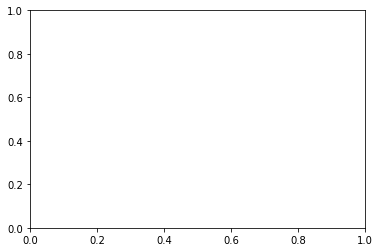

In [56]:
# Plot 1: Max Temperature vs. Demand
x_values = max_temp1
y_values = demand

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", edgecolor="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10, 10), fontsize=12,color="red")
plt.xlabel("Max Temprature (C)")
plt.ylabel("Demand (MWh)")
plt.title("Demand (MWh) vs. Max Temperature (C)")
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")
plt.show()

As the r-value is -0.073 we can say that the Max Temperature and the Demand have a strong negative association.

The r-value is: -0.15611825975470628


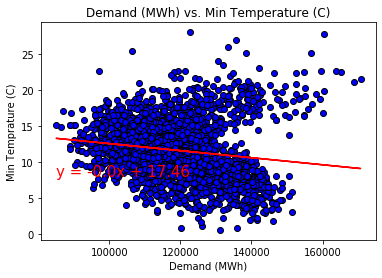

In [31]:
# Plot 2: Min Temperature vs. Demand
x_values = min_temp
y_values = demand

plt.scatter(x_values,y_values, marker = "o", facecolor = "blue", edgecolor="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (85000, 8), fontsize=15,color="red")
plt.xlabel("Demand (MWh)")
plt.ylabel("Min Temprature (C)")
plt.title("Demand (MWh) vs. Min Temperature (C)")
print(f"The r-value is: {rvalue}")
plt.show()

As the r-value is -0.073 we can say that the Max Temperature and the Demand have a very weak, almoste none association.